# Libraries

In [12]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler

from custom_kmeans import KMeansAlgorithm, plot_within_cluster_variation
from custom_dbscan import DBSCAN_algorithm

import matplotlib.pyplot as plt
np.random.seed(19)

# Data

In [2]:
dataset = np.array([[0, 0], [2, 4], [3, 3], [1, 2], [3, 0], [3, 1], [1, 1], [12, 18], [13, 17],
                [11, 15], [13, 14], [14, 16], [11, 16], [12, 15], [13, 18], [12, 5], [13, 2],
                [14, 4], [12, 3], [13, 1], [14, 2], [24, 19], [22, 22], [21, 24], [23, 21],
                [24, 20], [22, 39], [23, 38], [24, 39], [21, 37], [2, 26], [24, 6], [10, 36]])

Text(0.5, 1.0, 'Data from coursebook')

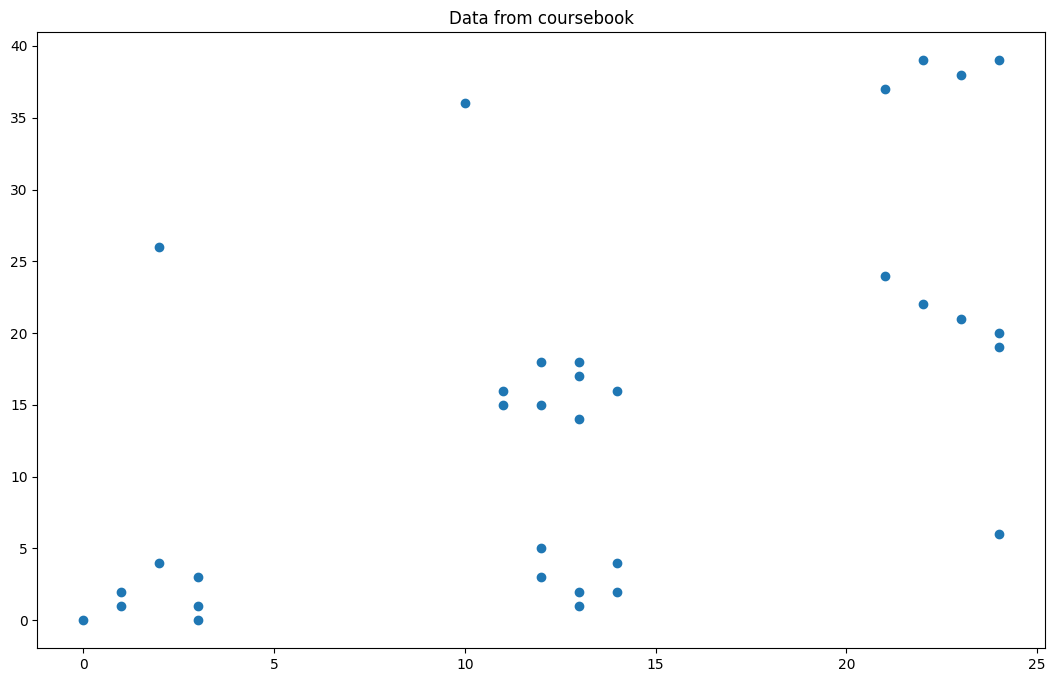

In [3]:
plt.figure(figsize=(13,8))
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.title('Data from coursebook')

In [4]:
dataset_sklearn, targets = make_blobs(n_samples=100, centers=5)

Text(0.5, 1.0, 'Generated data')

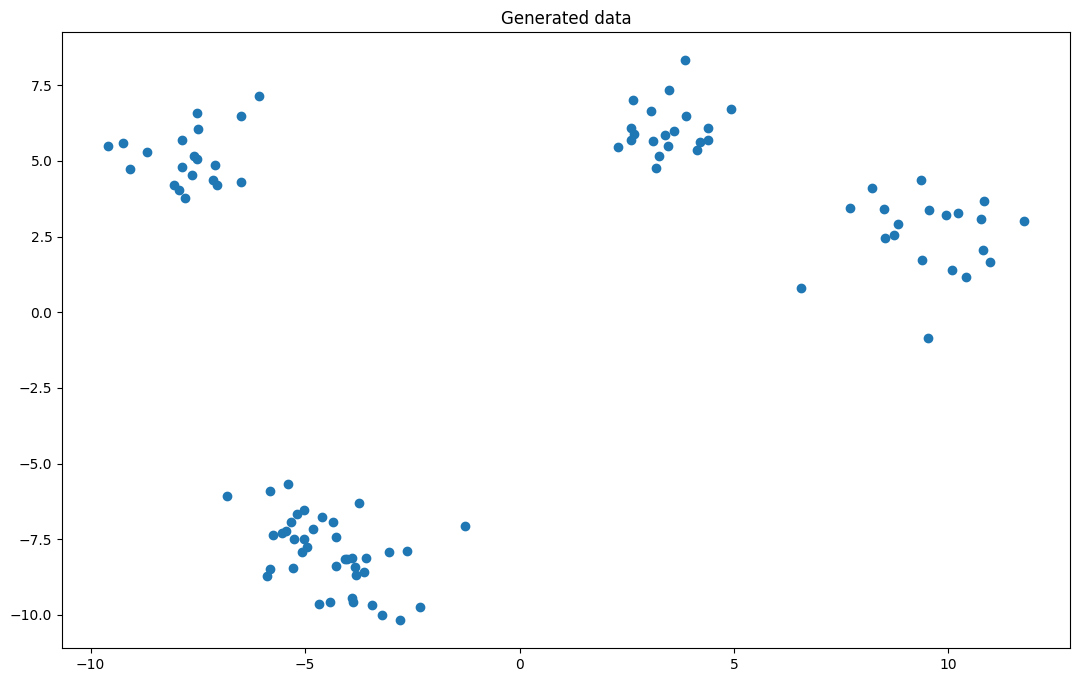

In [10]:
plt.figure(figsize=(13,8))
plt.scatter(dataset_sklearn[:, 0], dataset_sklearn[:, 1])
plt.title('Generated data')

# Apply custom algorithms

### K-means

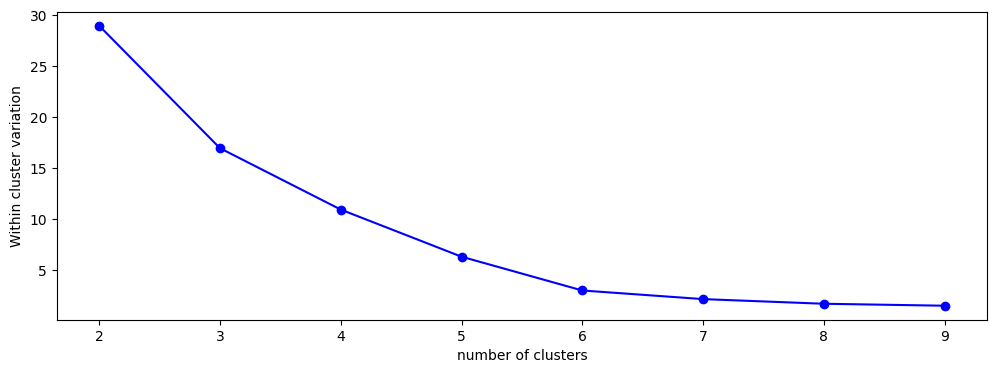

In [18]:
plot_within_cluster_variation(StandardScaler().fit_transform(dataset), KMeansAlgorithm(),
                              repeat=5, range_of_clusters=np.arange(2, 10), figsize=(12, 4))

/home/ffrankusha/work/university/ML-seminars/venv/lib64/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ffrankusha/work/university/ML-seminars/venv/lib64/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


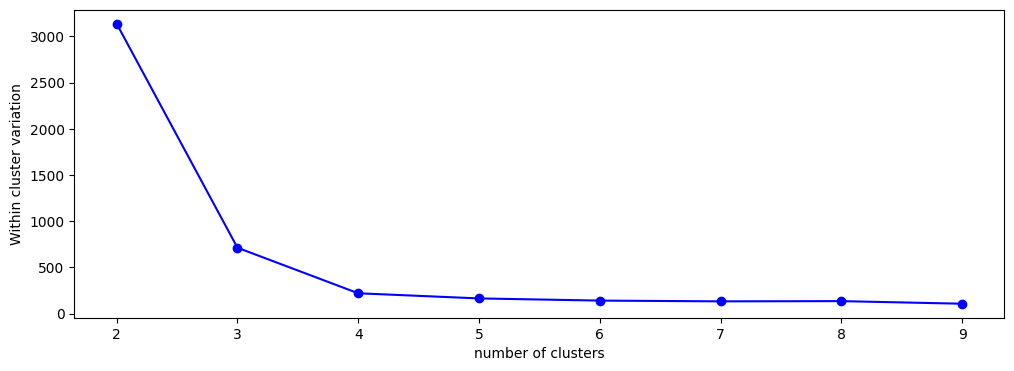

In [9]:
plot_within_cluster_variation(dataset_sklearn, KMeansAlgorithm(),
                              repeat=5, range_of_clusters=np.arange(2, 10), figsize=(12, 4))

### DBSCAN

The number of clusters is 5 and number of noise is 3


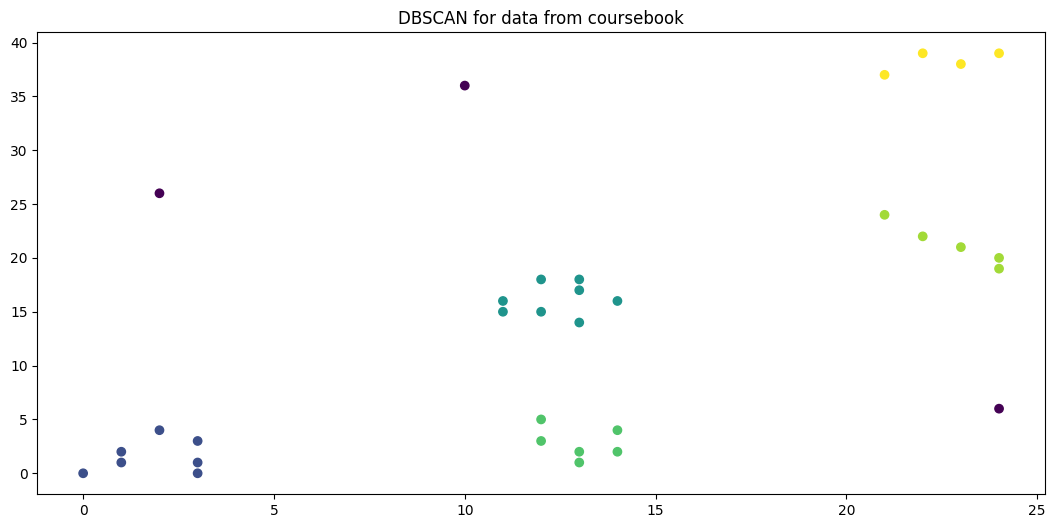

In [21]:
model = DBSCAN_algorithm()
labels = model.fit(StandardScaler().fit_transform(dataset))
number_of_clusters = len(set(labels)) - (1 if -1 in labels else 0)
number_of_noise_points = list(labels).count(-1)

print(f'The number of clusters is {number_of_clusters} and number of noise is {number_of_noise_points}')


plt.figure(figsize=(13, 6))
plt.scatter(dataset[:, 0], dataset[:, 1], c=labels)
plt.title('DBSCAN for data from coursebook')
plt.show()

# Apply sklearn algorithms

### K-means

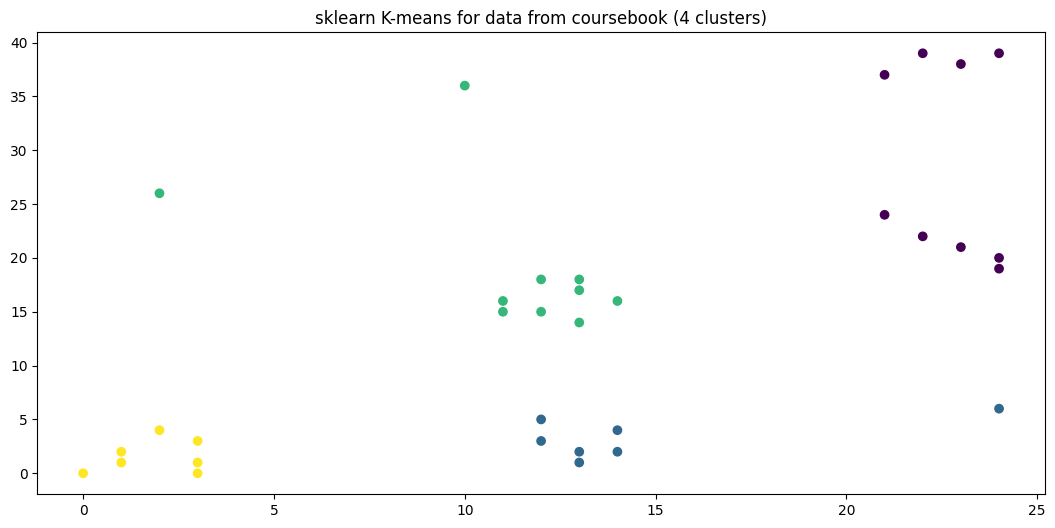

In [18]:
clusters = 4
model = KMeans(n_clusters=clusters)
model.fit(X=StandardScaler().fit_transform(dataset))

plt.figure(figsize=(13, 6))
plt.scatter(dataset[:, 0], dataset[:, 1], c=model.labels_)
plt.title(f'sklearn K-means for data from coursebook ({clusters} clusters)')
plt.show()

### DBSCAN

The number of clusters is 5 and number of noise is 3


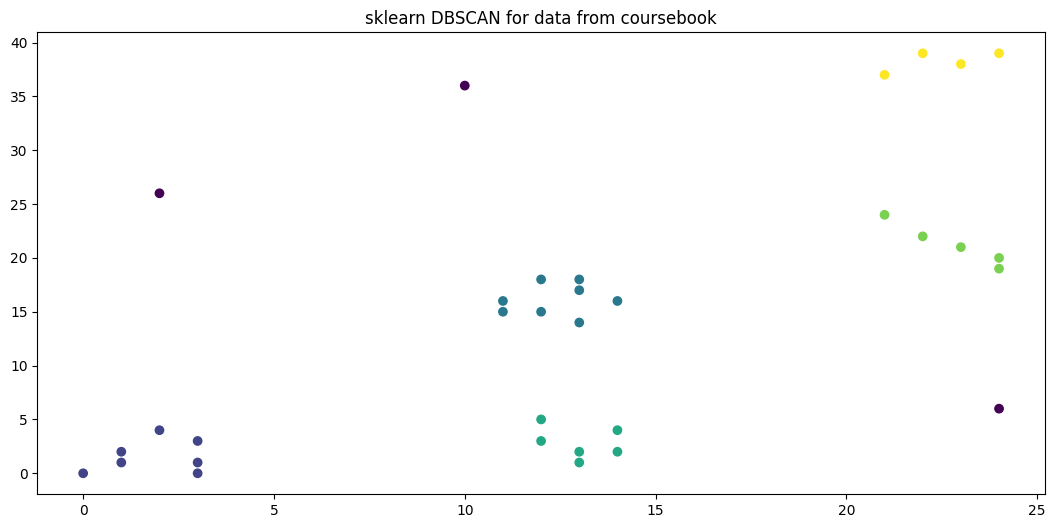

In [19]:
model = DBSCAN(eps=0.5, min_samples=3).fit(StandardScaler().fit_transform(dataset))
number_of_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
number_of_noise_points = list(model.labels_).count(-1)

print(f'The number of clusters is {number_of_clusters} and number of noise is {number_of_noise_points}')

plt.figure(figsize=(13, 6))
plt.scatter(dataset[:, 0], dataset[:, 1], c=model.labels_)
plt.title('sklearn DBSCAN for data from coursebook')
plt.show()